This document needs the file ripples.jpeg stored in Drive uploaded by clicking on the left menu before beginning the simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import cv2

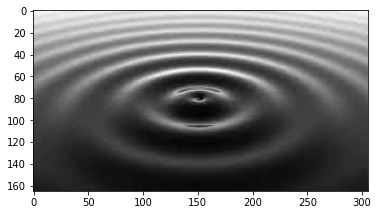

In [2]:
from PIL import Image
img = Image.open('ripples.jpeg').convert('L')
plt.imshow(img, cmap = 'gray')

In [3]:
# fft 
f = np.fft.fft2(img)

# shift the center
fshifted = np.fft.fftshift(f)

In [4]:
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

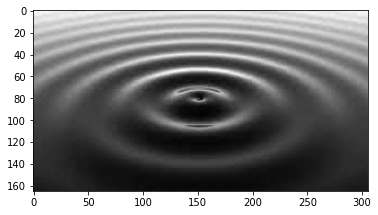

In [5]:
plt.imshow(img_back, cmap = 'gray')

In [6]:
x = fshifted
mat = x[np.arange(0,np.shape(x)[0],2)]

In [7]:
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)

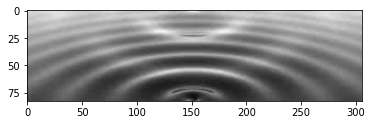

In [8]:
plt.imshow(img_back, cmap = 'gray')

In [9]:
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[0],2)]

In [10]:
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)

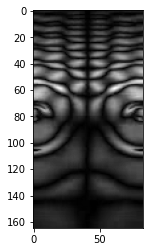

In [11]:
plt.imshow(img_back, cmap = 'gray')

The continuous signal has two frequencies $100$ Hz and $150$ Hz.

$$f(t) = 6 \cos(2\pi 100 t)$$

In [12]:
Fs = 220 # Sampling frequency of the continuous signal NOTICE THAT IS JUST ABOVE THE NYQUIST

tstep = 1 / Fs # Sampling interval

f0 = 100 # Signal frequency

N =  100 # Number of sampling points

t = np.linspace(0, (N - 1) * tstep, N) # Time steps

fstep = Fs / N # Frequency interval

f = np.linspace(0, (N - 1) * fstep, N) # Frequency steps

noise = np.random.normal(0, 1, N)

s = 6*np.cos(2 * np.pi *f0 * t) + noise # Sampling the continous signal

In [13]:
F = np.fft.fft(s)
F_mag = np.abs(F) / N

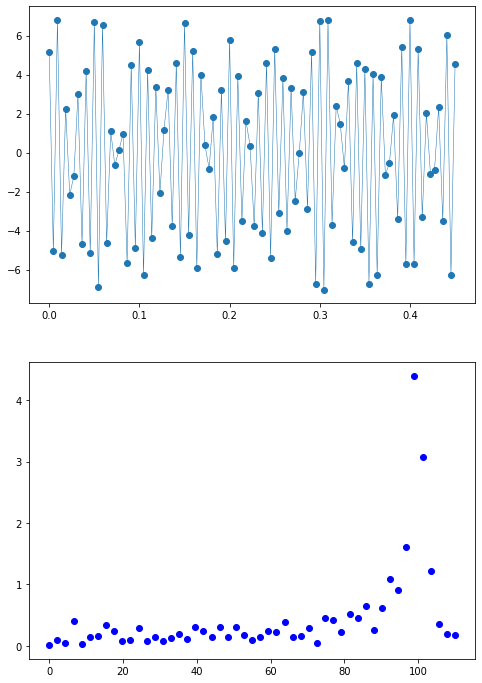

In [14]:
f_plot = f[0: int(N/2 + 1)]
F_mag_plot = 2 * F_mag[0:int(N/2 + 1)]
F_mag_plot[0] = F_mag_plot[0] / 2 # DC component

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
ax1.plot(t, s, 'o-', linewidth=.5)
ax2.plot(f_plot, F_mag_plot, 'bo')
plt.show()

The continuous signal has two frequencies $100$ Hz and $150$ Hz.

$$f(t) = 6 \cos(2\pi 100 t) + 15 \sin(2 \pi 150 t)
$$

In [15]:
Fs = 500 # Sampling frequency of the continuous signal

tstep = 1 / Fs # Sampling interval

f0 = 100 # Signal frequency
f1 = 150 # Second frequency

N =  100 # Number of sampling points

t = np.linspace(0, (N - 1) * tstep, N) # Time steps

fstep = Fs / N # Frequency interval

f = np.linspace(0, (N - 1) * fstep, N) # Frequency steps

s = 6*np.cos(2 * np.pi *f0 * t) + 15*np.sin(2 * np.pi *f1 * t) + noise # Sampling the continous signal

In [16]:
F = np.fft.fft(s)
F_mag = np.abs(F) / N

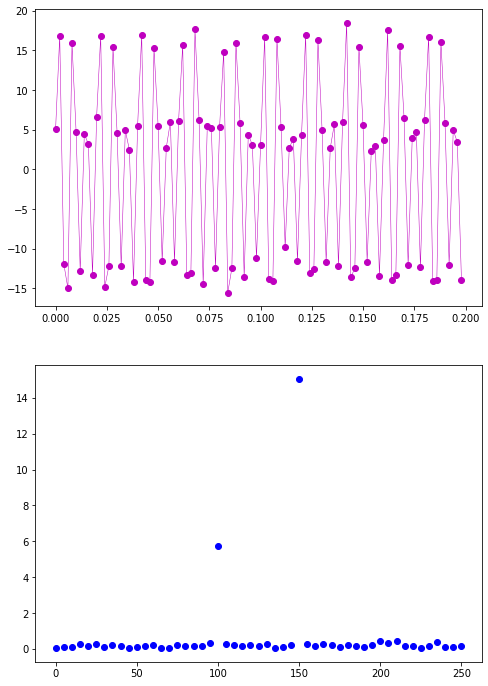

In [17]:
f_plot = f[0: int(N/2 + 1)]
F_mag_plot = 2 * F_mag[0:int(N/2 + 1)]
F_mag_plot[0] = F_mag_plot[0] / 2 # DC component

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
ax1.plot(t, s, 'mo-', linewidth=.5)
ax2.plot(f_plot, F_mag_plot, 'bo')
plt.show()

In [18]:
Fs = 220 # Sampling frequency of the continuous signal BELOW NYQUIST FOR ONE OF THE FREQUENCIES -> ALIASING

tstep = 1 / Fs # Sampling interval

f0 = 100 # Signal frequency
f1 = 150 # Second frequency

N =  100 # Number of sampling points

t = np.linspace(0, (N - 1) * tstep, N) # Time steps

fstep = Fs / N # Frequency interval

f = np.linspace(0, (N - 1) * fstep, N) # Frequency steps

s = 6*np.cos(2 * np.pi *f0 * t) + 15*np.sin(2 * np.pi *f1 * t)  # Sampling the continous signal

In [19]:
F = np.fft.fft(s)
F_mag = np.abs(F) / N

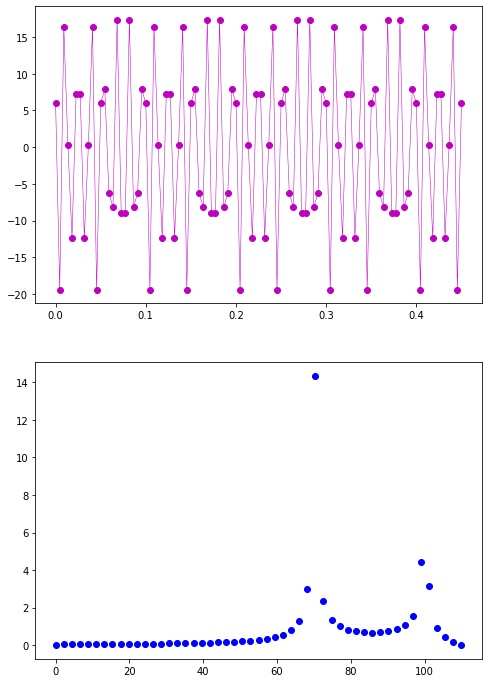

In [20]:
f_plot = f[0: int(N/2 + 1)]
F_mag_plot = 2 * F_mag[0:int(N/2 + 1)]
F_mag_plot[0] = F_mag_plot[0] / 2 # DC component

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
ax1.plot(t, s, 'mo-', linewidth=.5)
ax2.plot(f_plot, F_mag_plot, 'bo')
plt.show()

In [21]:
Fs = 190 # Sampling frequency of the continuous signal BELOW NYQUIST FOR BOTH OF THE FREQUENCIES -> ALIASING

tstep = 1 / Fs # Sampling interval

f0 = 100 # Signal frequency
f1 = 150 # Second frequency

N =  100 # Number of sampling points

t = np.linspace(0, (N - 1) * tstep, N) # Time steps

fstep = Fs / N # Frequency interval

f = np.linspace(0, (N - 1) * fstep, N) # Frequency steps

s = 6*np.cos(2 * np.pi *f0 * t) + 15*np.sin(2 * np.pi *f1 * t)  # Sampling the continous signal

In [22]:
F = np.fft.fft(s)
F_mag = np.abs(F) / N

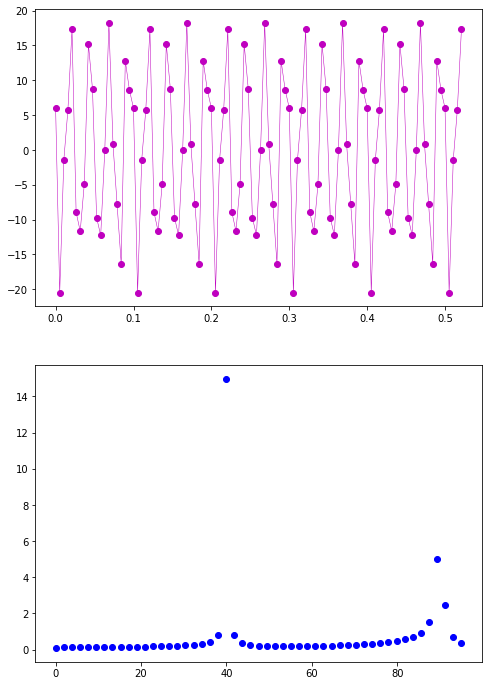

In [23]:
f_plot = f[0: int(N/2 + 1)]
F_mag_plot = 2 * F_mag[0:int(N/2 + 1)]
F_mag_plot[0] = F_mag_plot[0] / 2 # DC component

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))
ax1.plot(t, s, 'mo-', linewidth=.5)
ax2.plot(f_plot, F_mag_plot, 'bo')
plt.show()